In [14]:
from hyppo.tools import SIMULATIONS
from hypothesis_tests import get_test, NEWCORR, HSIC

from joblib import Parallel, delayed
import pickle

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
list(SIMULATIONS.keys())

['linear',
 'exponential',
 'cubic',
 'joint_normal',
 'step',
 'quadratic',
 'w_shaped',
 'spiral',
 'uncorrelated_bernoulli',
 'logarithmic',
 'fourth_root',
 'sin_four_pi',
 'sin_sixteen_pi',
 'square',
 'two_parabolas',
 'circle',
 'ellipse',
 'diamond',
 'multiplicative_noise',
 'multimodal_independence']

In [4]:
SIM_TITLES = [
    "Linear",
    "Exponential",
    "Cubic",
    "Joint Normal",
    "Step",
    "Quadratic",
    "W-Shaped",
    "Spiral",
    "Bernoulli",
    "Logarithmic",
    "Fourth Root",
    "Sine 4\u03C0",
    "Sine 16\u03C0",
    "Square",
    "Two Parabolas",
    "Circle",
    "Ellipse",
    "Diamond",
    "Noise",
    "Independence",
]

In [5]:
sim = SIMULATIONS["two_parabolas"]
n = 1000

x, y = sim(n, 1, noise=True)


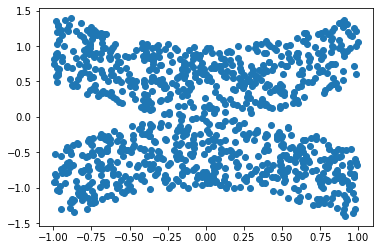

In [6]:
plt.scatter(x, y)

In [12]:
def compute_power(sim_name, n, test_name, n_sims=100):
    test_func = get_test(test_name)
    sim = SIMULATIONS[sim_name]
    def worker():
        x, y = sim(n, 1, noise=True)
        x, y = torch.tensor(x).reshape(-1), torch.tensor(y).reshape(-1)
        # perm = torch.randperm(n)
        # y = y[perm]
        stat, pvalue = test_func(x, y, compute_pvalue=True)
        if pvalue <= 0.05:
            return 1
        return 0
    rejects = np.array(Parallel(n_jobs=-3)(delayed(worker)() for _ in range(n_sims)))
    return rejects.mean()

In [22]:
sample_sizes = np.logspace(100, 10000, 30).astype(int)

for n in sample_sizes:
    for sim_name in list(SIMULATIONS.keys())[0:-2]:
        print(f"n = {n} sim = {sim_name}")
        test_name = NEWCORR
        n_sims = 500
        power = compute_power(sim_name, n, test_name, n_sims=n_sims)
        pickle.dump(power, open(f"results/boosting/sim_{sim_name}_test_{test_name}_n_{n}_power.p", "wb"))
pickle.dump(sample_sizes, open("results/boosting/sample_sizes.p", "wb"))

n = 3000 sim = linear
n = 3000 sim = exponential
n = 3000 sim = cubic
n = 3000 sim = joint_normal
n = 3000 sim = step
n = 3000 sim = quadratic
n = 3000 sim = w_shaped
n = 3000 sim = spiral
n = 3000 sim = uncorrelated_bernoulli
n = 3000 sim = logarithmic
n = 3000 sim = fourth_root
n = 3000 sim = sin_four_pi
n = 3000 sim = sin_sixteen_pi
n = 3000 sim = square
n = 3000 sim = two_parabolas
n = 3000 sim = circle
n = 3000 sim = ellipse
n = 3000 sim = diamond


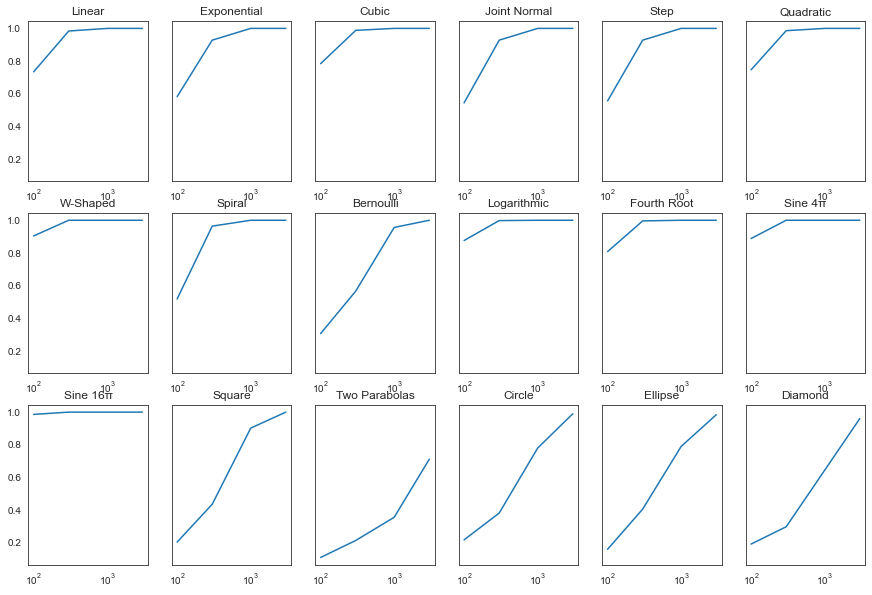

In [29]:
sns.set_style("white")

fig, ax = plt.subplots(3, 6, figsize=(15, 10), sharey=True)

# sample_sizes = pickle.load(open("results/boosting/sample_sizes.p", "rb"))
sample_sizes = [100, 300, 1000, 3000]

for k, sim_name in enumerate(list(SIMULATIONS.keys())[0:-2]):
    i = k // 6
    j = k % 6

    y = []
    for test_name in [NEWCORR]:
        for n in sample_sizes:
            y.append(pickle.load(open(f"results/boosting/sim_{sim_name}_test_{test_name}_n_{n}_power.p", "rb")))
        ax[i, j].plot(sample_sizes, y, label=test_name)
    
        
    ax[i, j].set_title(SIM_TITLES[k])
    ax[i, j].set_xscale("log")